# CORD-19 Software Mentions - Access Study

## Relation between citation characteristics and accessibility for analysis (RQ2)

In order to understand research software projects better, e.g., to
determine the qualities and characteristics that make research software projects
successful under a given definition of success, or that help make them sustainable,
or that underlie their collapse, access to their source code repositories is needed.
We wanted to find out which characteristics of software citations enable this access,
and how they relate to adherence to the software citation principles.

Some observable qualities of software mentions and citations can be linked to
adherence to the software citation principles:
a citation to software follows the principle of *Importance*, 
not mentioning a software violates that principle; 
identifying authors in references follows the *Credit and attribution* principle; 
providing access to a persistently archived version of source code in citations or references follows the *Persistence* principle; 
providing access to the source code more generally follows the *Accessibility* principle,
which is the one that this question is most concerned with;
providing version information for software that was used follows the *Specificity* principle.

The results of this part of the study would provide evidence concerning the suitability
of the software citation principles for software accessibility.

## Methodology

The dataset of 80 software mentions was manually annotated by SD to
classify for adherence to the software citation principles, and the
possibility to directly or indirectly access the source code of the
mentioned software.
The table below presents the annotations for
mention features that were actually found in the dataset. The dataset
itself is available as *CSM\_sampled\_mention\_access.csv*.

  | Code |   Description |
  | :--- | :--- |
  | VER | Version information in reference
  | CVER | Version information near mention
  | CRE | Information in reference allowing for personal credit
  | REP | Link to community repository in reference
  | CACC | Link to source code near mention

> Table: Annotations for accessibility
  and adherence to the software citation principles, for which
  respective mention features could be found in our dataset.

In [15]:
# Import dependencies
import pandas as pd
import numpy as np

Read the access dataset as a pandas dataframe, and print it as a sanity check.

In [16]:
df = pd.read_csv(r'../data/access_study/CSM_sampled_mention_access.csv', encoding='unicode_escape', engine='python', index_col=False).fillna(0)
print(df)

    Unnamed: 0   ID       Title QACode Mention Type  \
0            0    1  Sequencher     SC          INS   
1            1    1  Sequencher     SC          NAM   
2            2    1  Sequencher     SC          NAM   
3            3    1  Sequencher     SC          PRO   
4            4    1  Sequencher     SC          INS   
..         ...  ...         ...    ...          ...   
75          75   91         SYN     ST          PUB   
76          76   94    Adequest     SC          INS   
77          77   96   NRSur PHM     SC          PUB   
78          78   97       PVSio     ST          PUB   
79          79  100      discmo     ST          NAM   

   Accessibility and Principledness Access  \
0                              CVER      N   
1                              CVER      N   
2                              CVER      N   
3                               VER      N   
4                              CVER      N   
..                              ...    ...   
75               

### Accessibility

Print the totals for each access type annotation.

The annotations are in column *Access*, where
*D* means *direct access is possible from the mention*,
*I* means _**in**direct access is possible from the mention_ and
*N* means *no access is possible from the mention*.

Also convert the raw values to printable column headers.

In [17]:
access = df['Access']
access = access.str.replace('N', 'No access')
access = access.str.replace('D', 'Direct access')
access = access.str.replace('I', 'Indirect access')
access_totals = access.value_counts()
access_totals

No access          66
Indirect access    12
Direct access       2
Name: Access, dtype: int64

Calculate the percentages for each of the totals.

In [18]:
access_percent = access.value_counts(normalize=True)
access_percent100 = access_percent.mul(100).round(1).astype(str)
access_df = pd.DataFrame({'No. of mentions': access_totals, '% of mentions': access_percent100})
access_df

,No. of mentions,% of mentions
No access,66,82.5
Indirect access,12,15.0
Direct access,2,2.5


Convert this new dataframe to latex and print it.

In [19]:
print(access_df.to_latex())

\begin{tabular}{lrl}
\toprule
{} &  No. of mentions & \% of mentions \\
\midrule
No access       &               66 &          82.5 \\
Indirect access &               12 &          15.0 \\
Direct access   &                2 &           2.5 \\
\bottomrule
\end{tabular}



### Adherence to principles

Look at the characteristics that one expects to have in adherence to the software citation principles.

We cannot detect the ommission of mentions for software that was used in reported research, but we can detect the existence of
- author names that allow for credit;
- a link or identifier for a persistently archived version of the software that was used;
- a link that allows us to access the source code;
- a version identifier.

The dataset contains annotations for instances where we found this information:

In [20]:
expanded_annos = {
    'CRE': 'Creditable author information in reference',
    'CACC': 'Link for access to source code near mention',
    'CVER': 'Version information near mention',
    'VER': 'Version information in reference',
    'REP': 'Link to community repository in reference',
    'N': 'No information in adherence to principles',
}

# Render as LaTeX
print(pd.DataFrame(expanded_annos, index = ['Description']).transpose().to_latex(column_format='rl'))

\begin{tabular}{rl}
\toprule
{} &                                  Description \\
\midrule
CRE  &   Creditable author information in reference \\
CACC &  Link for access to source code near mention \\
CVER &             Version information near mention \\
VER  &             Version information in reference \\
REP  &    Link to community repository in reference \\
N    &    No information in adherence to principles \\
\bottomrule
\end{tabular}



Define a function for exploding cell-values that are comma-separated string lists.

In [ ]:
# We need to expand a) comma-separated mention types, and then b) comma-separated features.
def explode_list(str_list_candidate):
    '''Explodes a comma-separated string list into a Python list.'''
    items = str_list_candidate.split(',')
    items = [i.strip() for i in items]
    return items

Now count the occurrence of annotations.

In [21]:
# Create data structure with clustering information
clusters = {
    'Author information': {'annos': {'CRE'}},
    'Software links': {'annos': {'CACC', 'REP'}},
    'Version information': {'annos': {'VER', 'CVER'}},
    'No information': {'annos': {'N'}}
}

# Cluster the annotations
for i in df.index:
    for category in clusters:
        raw_val = df['Accessibility and Principledness'][i]
        vals = explode_list(raw_val)
        for val in vals:
            if val in clusters[category]['annos']:
                # Iterate count if count already exists, or create inital count
                if val in clusters[category]:
                    clusters[category][val] += 1
                else:
                    clusters[category][val] = 1

# Print final data structure as sanity check
clusters

{'Author information': {'annos': {'CRE'}, 'CRE': 25},
 'Software links': {'annos': {'CACC', 'REP'}, 'CACC': 1, 'REP': 1},
 'Version information': {'annos': {'CVER', 'VER'}, 'CVER': 14, 'VER': 3},
 'No information': {'annos': {'N'}, 'N': 42}}

Create a new dataframe to hold the clusters, and sum up occurrences for single features in cluster category.

In [22]:
# NaN values in dataframe should be filled with zeroes, and dataframe should be transposed
df2 = pd.DataFrame(clusters).fillna(0).transpose()
# Drop the unneeded column showing the annotations belonging to a category
df2 = df2.drop(['annos'], axis=1)
# Add a column showing the category total, summing up the counts of the single subcategories
df2.insert(0, 'Total', df2.sum(axis=1, skipna=True).astype(int))
df2

,Total,CRE,CACC,REP,CVER,VER,N
Author information,25,25,0,0,0,0,0
Software links,2,0,1,1,0,0,0
Version information,17,0,0,0,14,3,0
No information,42,0,0,0,0,0,42


Render the new dataframe as a LaTeX table.

In [23]:
print(df2.to_latex(index=False, column_format='rccccccc'))

\begin{tabular}{rccccccc}
\toprule
 Total & CRE & CACC & REP & CVER & VER &  N \\
\midrule
    25 &  25 &    0 &   0 &    0 &   0 &  0 \\
     2 &   0 &    1 &   1 &    0 &   0 &  0 \\
    17 &   0 &    0 &   0 &   14 &   3 &  0 \\
    42 &   0 &    0 &   0 &    0 &   0 & 42 \\
\bottomrule
\end{tabular}



Render this more nicely as a stacked bar plot.

                    CRE CACC REP CVER VER   N
Software links        0    1   1    0   0   0
Version information   0    0   0   14   3   0
Author information   25    0   0    0   0   0
No information        0    0   0    0   0  42
[ 0.  0. 25.  0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[ 0. 14.  0.  0.]
[0. 3. 0. 0.]
[ 0.  0.  0. 42.]


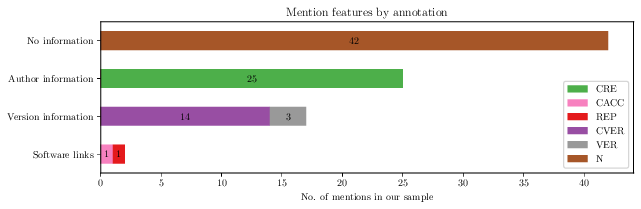

In [24]:
%matplotlib inline

# Use matplotlib to create this and following plots
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update(
    {
        # Adjust to your LaTex-Engine
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "axes.unicode_minus": False,
    }
)
import matplotlib.pyplot as plt

# Sort by category total in decending order
df2.sort_values(by=['Total'], inplace=True, ascending=True)

# Collect columns to render (exclude Total)
plot_cols = [col for col in df2.columns.tolist() if col not in ['Total']]

# Colourblind/-friendly colours adapted from https://gist.github.com/thriveth/8560036
my_colors = ['#4daf4a', '#f781bf', '#e41a1c', '#984ea3', '#999999', '#a65628']

# Create the plot
print(df2[plot_cols])
ax = df2[plot_cols].plot(kind='barh', stacked=True, figsize=(9,3), color=my_colors)
plt.tight_layout()

# Add a title and rotate the x-axis labels to be horizontal
plt.title('Mention features by annotation')
plt.xticks(rotation=0, ha='center')
plt.xlabel('No. of mentions in our sample')

# Add labels to bar sections, unless the value is 0
for c in ax.containers:
    print(c.datavalues)
    ax.bar_label(c, labels = ['' if v == 0 else int(v) for v in c.datavalues], label_type='center')
    
# Save the plot
plt.tight_layout()
# Save as pgf
plt.savefig('mentions-by-annotation.pgf')
# Show the plot
plt.show()

Analyse feature distribution over mention types.

In [30]:
# Create a new dataframe and initialize it with the columns we want
typ_cols = ['cat', 'subcat', 'feature', 'count']
typ_df = pd.DataFrame(columns=typ_cols)

# Re-cluster, but this time also record mention type
# We need a new map from features to mention types, and from single annotations to mention types
for i in df.index:
    # Get single values for feature annotations and mention types
    acc_raw = df['Accessibility and Principledness'][i]
    acc_vals = explode_list(acc_raw)
    typ_raw = df['Mention Type'][i]
    typ_vals = explode_list(typ_raw)
    # Dive into the feature annotations
    for acc in acc_vals:
        for category in clusters:
            # Find the cluster the annotation we look at belongs to
            if acc in clusters[category]['annos']:
                for typ in typ_vals:
                    # Set up filters to find the single row for this combination of 
                    # category, annotation and mention type
                    mf_1 = typ_df['cat'] == category
                    mf_2 = typ_df['subcat'] == acc
                    mf_3 = typ_df['feature'] == typ
                    # Get index of the single filtered row
                    indices = typ_df.index[mf_1 & mf_2 & mf_3].tolist()
                    # There shold either be a single row, or the row doesn't yet exist. not exist
                    # Assert this.
                    assert len(indices) in [0, 1]
                    target_row = typ_df.loc[mf_1 & mf_2 & mf_3]
                    if target_row.empty:
                        # Initialize a new row with a count of 1.
                        typ_df.loc[len(typ_df.index)] = [category, acc, typ, 1]
                    else:
                        # Double-check that there is exactly 1 row found, and up the count by 1
                        assert len(indices) == 1
                        typ_df.at[indices[0], 'count'] += 1

# Sort the dataframe
typ_df.sort_values(by=['cat', 'subcat', 'feature'], inplace=True)
# Create a new dataframe with hierarchical indices for sanity check
multi_df = typ_df.set_index(['cat', 'subcat', 'feature', 'count'])
# Create a new dataframe that we'll use to plot the results
plot_df = typ_df.sort_values(by=['feature', 'cat', 'subcat', 'count'])
# Show the saniy check dataframe
multi_df

KeyError: 'annos'

In [26]:
# Prepare a set and a list of mention types
types = set()
for values in df['Mention Type'].unique():
    types.update(explode_list(values))
types_list = list(types)
# Prepare a set and a list of accessibility annotations
annos = set()
for values in df['Accessibility and Principledness'].unique():
    annos.update(explode_list(values))
annos_list = list(annos)

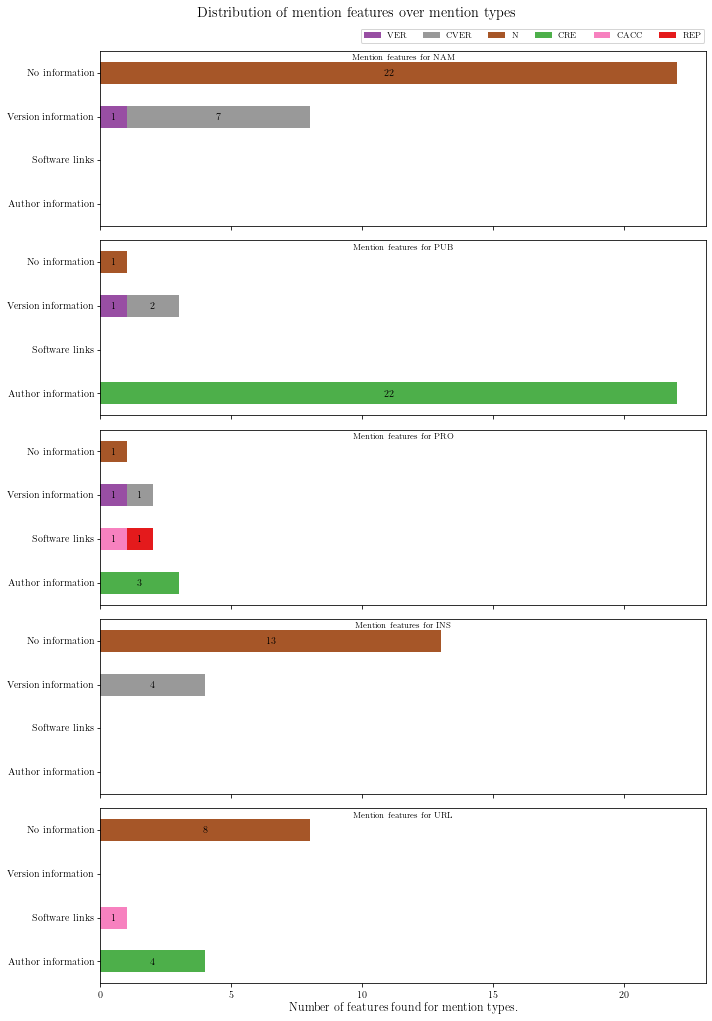

In [27]:
%matplotlib inline
# Set the colourblind-accessible colours as default colours
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=my_colors) 
# Reindex the plotting dataframe
plot_df = plot_df.reindex(columns=['feature', 'cat', 'subcat', 'count'])

# Prepare a data structure to be filled from the original dataframe
typ_cluster = {
    'Author information': {'CRE': {}},
    'Software links': {'CACC': {}, 'REP': {}},
    'Version information': {'VER': {}, 'CVER': {}},
    'No information': {'N': {}}
}

# We'll have more than one cluster, prepare a dict
clusters = {}

# Use the copy package to deep copy the cluster data structure
import copy

for typ in types:
    # Create a deep copy of the data structure to take up values for this mention type
    _cl = copy.deepcopy(typ_cluster)
    # Create a dedicated dataframe for this mention type
    typ_df = plot_df.loc[plot_df['feature'] == typ]
    # Iterate through the data type and count occurrences
    for i, row in typ_df.iterrows():
        _cl[row['cat']][row['subcat']] = row['count']
    # Add the data structure to the clusters dict
    clusters[typ]= _cl

# Prepare 5 vertically stacked subplots for the 5 clusters, which share the x axis
fig, axes = plt.subplots(nrows = 5, sharex = True, figsize=(10,14))
plt.suptitle('Distribution of mention features over mention types', y=1.01, fontsize='x-large')

# Set up a colour dict, so that the bars for each feature always have the same colour
color_dict = {'CRE': my_colors[0], 'CACC': my_colors[1], 'REP': my_colors[2], 'VER': my_colors[3], 'CVER': my_colors[4], 'N': my_colors[5]}

for i, cl in enumerate(clusters.items()):
    # Get data for the respective cluster
    typ = cl[0]
    _df = pd.DataFrame(cl[1]).transpose()
    # Create a horizontal bar plot for the data
    _ax = _df.plot(kind='barh', stacked=True, color=color_dict, ax=axes[i])
    _ax.set_title('Mention features for ' + typ, y=1.03, pad=-14, fontsize='small')
    plt.xticks(rotation=0, ha='center')
    plt.xlabel('Number of features found for mention types.', fontsize='large')

    # Add values to bar sections
    for c in _ax.containers:
        _ax.bar_label(c, labels = ['' if v == 0 else int(v) for v in c.datavalues], label_type='center')

# Remove the legends from all plots to use a single legend instead
for ax in fig.axes:
    ax.get_legend().remove()

# Create elements for the legend
from matplotlib.patches import Patch
legend_elements = []
for anno in annos:
    legend_elements.append(Patch(facecolor=color_dict[anno], label=anno))

# Create the unified legend for the subplots
fig.legend(handles=legend_elements, ncol=6, 
           bbox_to_anchor=(.5, .97),
           loc='lower left', 
           fontsize='small')

# Format, save, and show plot
plt.tight_layout()
plt.savefig('features-over-mentions.pgf')
plt.show()

Create a bubble plot to show accessibility over mention types and feature annotations.

<Figure size 1440x864 with 0 Axes>

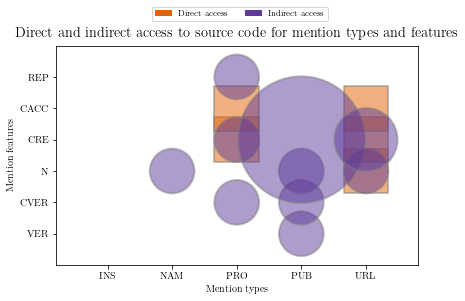

In [28]:
# Create a dict to take up data
access_data = {}
# Copy the original dataframe and replace NaN values with 'N'
access_df = copy.deepcopy(df).fillna('N')

# Iterate through the dataframe rows to fil the data structure
for i in access_df.index:
    # Get mention type first
    typ_raw = access_df['Mention Type'][i]
    # Can be a comma-separated list, so explode that
    typs = explode_list(typ_raw)
    for typ in typs:
        # Get the respective dict for the mention type, or create it in the first place
        if typ in access_data.keys():
            typ_dict = access_data[typ]
        else:
            typ_dict = access_data[typ] = {}
        # Get feature annotations
        anno_raw = access_df['Accessibility and Principledness'][i]
        # Can be a comma-separated list, so explode that
        feature_annos = explode_list(anno_raw)
        # Make sure that there is a dict with zero values for all cells
        for anno_val in annos:
            if anno_val not in typ_dict.keys():
                typ_dict[anno_val] = {'I': 0, 'D': 0}
        # Count the occurrences of feature annotations
        for anno in feature_annos:
            # The dict for this feature annotation is guaranteed to exist now
            anno_dict = typ_dict[anno]
            # Get the access annotation for this row
            access = access_df['Access'][i]
            # 'N' values represent 0 anyway, so ignore them
            if not access == 'N':
                # Initialize or up the count for the respective access annotation
                if access in anno_dict.keys():
                    anno_dict[access] += 1
                else:
                    anno_dict[access] = 1
                    
# Initialize lists to be used in the plot
type_list = []
feature_list = []
indirect_list = []
direct_list = []

# Fill the lists with the respective values for each row
for typ in access_data.items():
    typ_val = typ[0]
    for feature in typ[1].items():
        feature_val = feature[0]
        type_list.append(typ_val)
        feature_list.append(feature_val)
        indirect_list.append(feature[1]['I'])
        direct_list.append(feature[1]['D'])

# Create a dataframe from the lists to be used for the plot
access_plot_df = pd.DataFrame({'Type': type_list,
                               'Feature': feature_list,
                               'Indirect access': indirect_list,
                               'Direct access': direct_list
                              })

# Create the plot
plt.figure(figsize=(20,12))
fig, ax = plt.subplots()
# Scatter plot the two different access types
plt.scatter(type_list, feature_list, s=np.asarray(direct_list)*2000, c='#E66100', alpha=0.5, 
            edgecolors="grey", linewidth=2, marker='s')
plt.scatter(type_list, feature_list, s=np.asarray(indirect_list)*2000, c='#5D3A9B', alpha=0.5, 
            edgecolors="grey", linewidth=2, marker='o')
 
# Add titles (main and on axis)
plt.xlabel('Mention types')
plt.ylabel('Mention features')
plt.title('Direct and indirect access to source code for mention types and features', y=1.01, fontsize='x-large')
# Make sure the ticks are far enough from the splines to fully show
plt.margins(.2)

# Add a legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#E66100', label='Direct access'),
                   Patch(facecolor='#5D3A9B', label='Indirect access')]

# Create the legend
fig.legend(handles=legend_elements, ncol=6, 
           bbox_to_anchor=(.35, .97),
           loc='lower left', 
           fontsize='small')


# Format, save, and show the graph
plt.tight_layout()
plt.savefig('access-bubble-plot.pgf')
plt.show()
